# Characterizing Attackers
- How many attackers are vandals vs normal users vs power users ?
- are victims also trolls ?
- investigate anons, gender, tenure, status

In [15]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from load_utils import *
from analysis_utils import compare_groups,get_genders

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
d = load_diffs()
df_events, df_blocked_user_text = load_block_events_and_users()

# Attacker Specific Analysis

### Q: Are users blocked for personal attacks pure trolls/vandals?

Methodology: Consider users blocked for harassment. Compute histogram over mean user level aggression and attack scores.

### Aggression

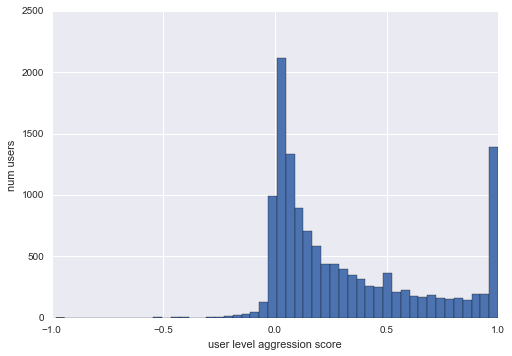

In [4]:
d['blocked'].groupby('user_text')['pred_aggression_score']\
        .agg( {'aggressiveness': np.mean})\
        .hist(bins = 50)
plt.xlabel('user level aggression score')
plt.ylabel('num users')
plt.title('')

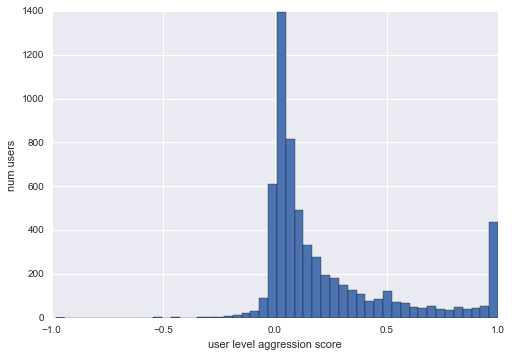

In [5]:
# lets exclude anons 
d['blocked'].query('not author_anon').groupby('user_text')['pred_aggression_score']\
    .agg( {'aggressiveness': np.mean})\
    .hist(bins = 50)
plt.xlabel('user level aggression score')
plt.ylabel('num users')
plt.title('')

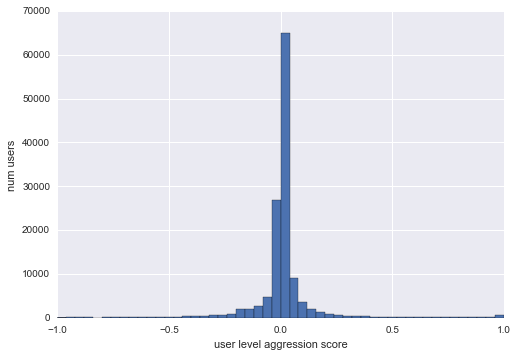

In [6]:
# lets compare to non-blocked users
# NOTE: would be better to have taken a random sample of users

d['2015'].query('not author_anon').groupby('user_text')['pred_aggression_score']\
    .agg( {'aggressiveness': np.mean})\
    .hist(bins = 50)
plt.xlabel('user level aggression score')
plt.ylabel('num users')
plt.title('')

### Attack

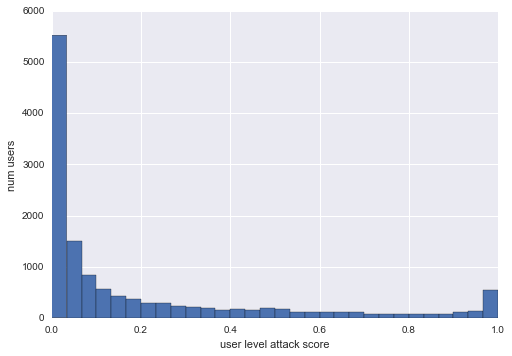

In [7]:
d['blocked'].groupby('user_text')['pred_recipient_score']\
                 .agg( {'aggressiveness': np.mean}).hist(bins = 30)
plt.xlabel('user level attack score')
plt.ylabel('num users')
plt.title('')

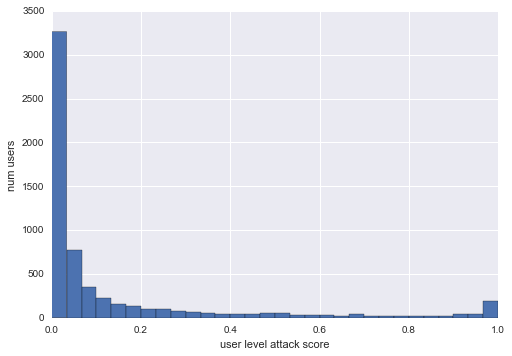

In [8]:
d['blocked'].query('not author_anon').groupby('user_text')['pred_recipient_score']\
                 .agg( {'aggressiveness': np.mean}).hist(bins = 30)
plt.xlabel('user level attack score')
plt.ylabel('num users')
plt.title('')

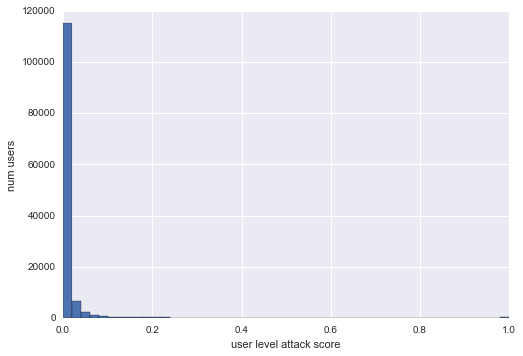

In [9]:
d['2015'].query('not author_anon').groupby('user_text')['pred_recipient_score']\
    .agg( {'aggressiveness': np.mean})\
    .hist(bins = 50)
plt.xlabel('user level attack score')
plt.ylabel('num users')
plt.title('')

### Q: Do attacks come from pure trolls or from users who are generally non-attacking? 

For different thresholds, assign each attack its users aggression score. Plot cdfs over aggression scores. 

In [10]:
# TODO

# Victim Specific Analysis

### Q Are victims also trolls?

In [24]:
# TODO

# Shared Analysis

### Q: How do comments made by registered and anonymous authors compare?

             pred_aggression_score  pred_recipient_score
author_anon                                             
False                    -0.019228              0.013021
True                      0.116807              0.068351


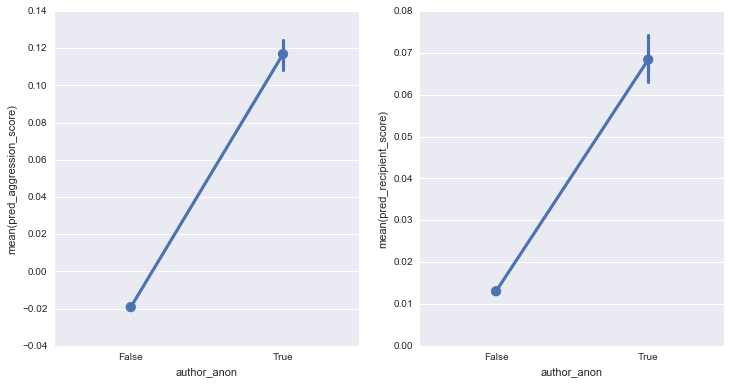

In [26]:
o = (False, True)
x = 'author_anon'
compare_groups(d['sample'][:100000], x, order = o)

### Q: How do comments received by registered and anonymous authors compare?

                pred_aggression_score  pred_recipient_score
recipient_anon                                             
False                       -0.021372              0.014780
True                         0.013863              0.013632


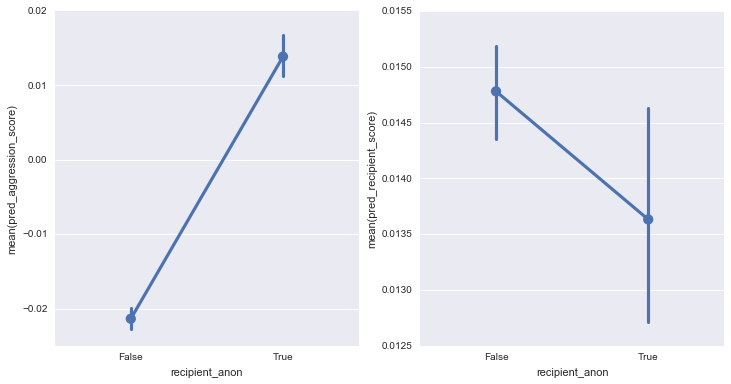

In [27]:
# don't count posts to own article
o = (False, True)
x = 'recipient_anon'
compare_groups(d['sample'][:100000].query('not own_page'), x, order = o)

### Q: How do authors write differently on their own page than on other pages?

          pred_aggression_score  pred_recipient_score
own_page                                             
False                 -0.016567              0.014623
True                   0.000447              0.018982


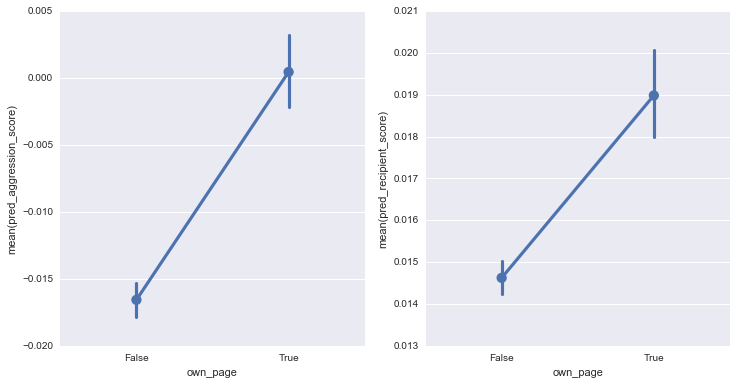

In [12]:
x = 'own_page'
o = (False, True)
compare_groups(d['sample'][:100000], x, order = o)

                      pred_aggression_score  pred_recipient_score
own_page author_anon                                             
False    False                    -0.021969              0.012393
         True                      0.103808              0.064316
True     False                    -0.008366              0.015506
         True                      0.158183              0.081194


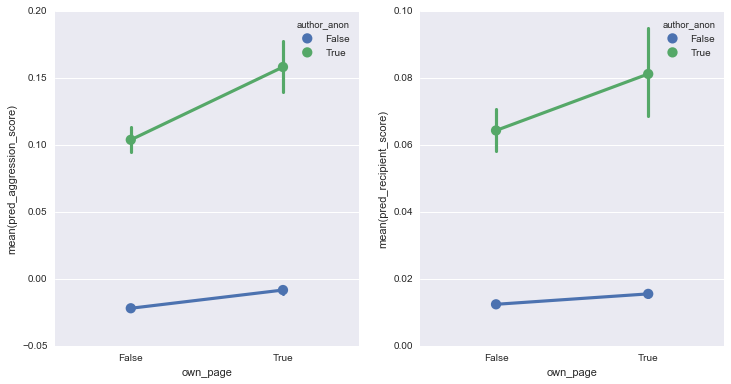

In [13]:
x = 'own_page'
compare_groups(d['sample'][:100000], x, order = o, hue = 'author_anon')

### Q: What is the effect of the author's gender?

In [ ]:
d_gender = get_genders(d['sample'])

                     pred_aggression_score  pred_recipient_score
author_gender                                                   
female                           -0.024550              0.010297
male                             -0.011060              0.008770
unknown: registered              -0.003082              0.010245
unknown:anon                      0.066485              0.026189


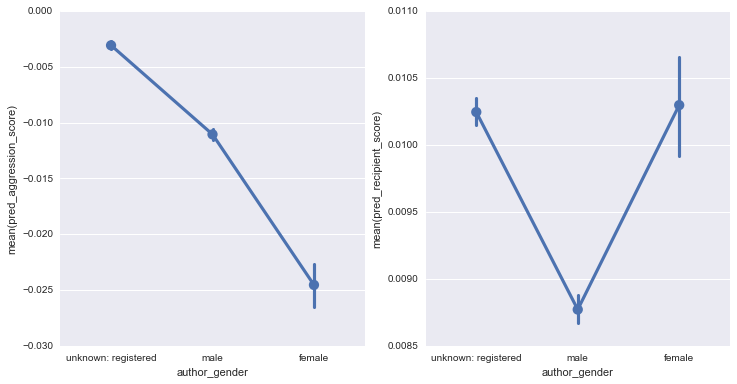

In [21]:
o = ('unknown: registered', 'male', 'female')
x = 'author_gender'
compare_groups(d_gender, x, order = o)

### Q: What is the effect of the recipient's gender?

In [28]:
o = ('unknown: registered', 'male', 'female')
x = 'recipient_gender'
compare_groups(d_gender.query('not own_page'), x, order= o)

NameError: name 'df_no_admin_gender' is not defined

### Q: How does the effect change when you interact author and recipient gender?

                                         pred_aggression_score  \
author_gender       recipient_gender                             
female              female                           -0.067287   
                    male                             -0.050305   
                    unknown: registered              -0.021509   
male                female                           -0.032398   
                    male                             -0.028933   
                    unknown: registered              -0.009496   
unknown: registered female                           -0.035441   
                    male                             -0.024004   
                    unknown: registered              -0.001018   
unknown:anon        female                            0.086891   
                    male                              0.095041   
                    unknown: registered               0.062846   

                                         pred_recipient_score  
author_gend

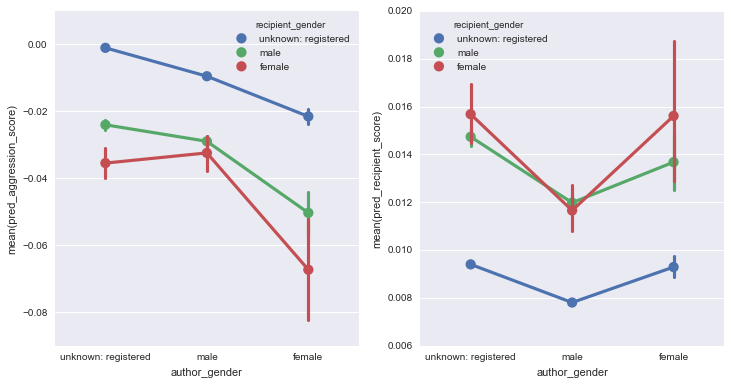

In [23]:
o = ('unknown: registered', 'male', 'female')
x = 'author_gender'
compare_groups(d_gender.query("not own_page and recipient_gender != 'unknown:anon'"), x, order = o, hue = 'recipient_gender')

### Q: How does tone depend on the frequency of commenting?

Methodology: let the "aggressiveness" of a user be the averge aggression_score of all their comments. Compare aggression scores across groups of users based on how much the post

In [29]:
tresholds = np.percentile(d['2015']['user_text'].value_counts(),  np.arange(0, 100.01,0.5 ))
tresholds = sorted(set(tresholds.astype(int)))

In [30]:
bins = []
for i in range(len(tresholds)-1):
    label = '%d-%d' % (tresholds[i], tresholds[i+1]-1)
    rnge = range(tresholds[i], tresholds[i+1])
    bins.append((label, rnge))

In [31]:
def map_count(x):
    for label, rnge in bins:
        if x in rnge:
            return label
        
        
d_temp = d['2015'].query('not author_anon')\
                 .groupby('user_text')['pred_aggression_score']\
                 .agg( {'aggressiveness': np.mean, 'count': len})\
                 .assign(num_comment_range = lambda x: x['count'].apply(map_count))

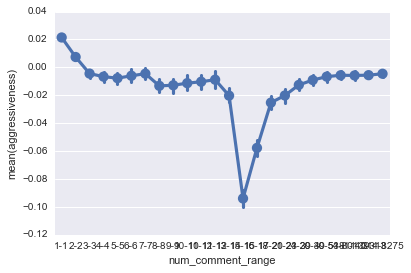

In [32]:
o = [e[0] for e in bins]
sns.pointplot(x='num_comment_range', y= 'aggressiveness', data= d_temp, order = o)

In [33]:
# TODO: extend to attacks, use long term user data, repeat for victims